
##**Name - Affan**
##**Roll No. - 242210001**
##**Date - 21/01/2025**



---

# Web Scraping -

##**1. Scrape Book Information:**

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

def scrape_page(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.content, "html.parser")
    books = []
    for book in soup.find_all("article", class_="product_pod"):
        title = book.h3.a["title"]
        price = book.find("p", class_="price_color").text[1:]
        rating = book.p["class"][1]
        availability = book.find("p", class_="instock availability").text.strip()
        books.append([title, price, rating, availability])
    return books

def scrape_all_pages(base_url, num_pages):
    all_books = []
    for page_num in range(1, num_pages + 1):
        url = f"{base_url}/catalogue/page-{page_num}.html"
        books = scrape_page(url)
        all_books.extend(books)
    return all_books

base_url = "https://books.toscrape.com"
num_pages = 50
all_books = scrape_all_pages(base_url, num_pages)



##**Part 2: Organize the Data:**

In [2]:
# Creating the DataFrame
df = pd.DataFrame(all_books, columns=["Title", "Price", "Rating", "Availability"])
df["Price"] = pd.to_numeric(df["Price"], errors="coerce")

df.to_csv("books_data.csv", index=False)
print(df)

                                                 Title  Price Rating  \
0                                 A Light in the Attic  51.77  Three   
1                                   Tipping the Velvet  53.74    One   
2                                           Soumission  50.10    One   
3                                        Sharp Objects  47.82   Four   
4                Sapiens: A Brief History of Humankind  54.23   Five   
..                                                 ...    ...    ...   
995  Alice in Wonderland (Alice's Adventures in Won...  55.53    One   
996   Ajin: Demi-Human, Volume 1 (Ajin: Demi-Human #1)  57.06   Four   
997  A Spy's Devotion (The Regency Spies of London #1)  16.97   Five   
998                1st to Die (Women's Murder Club #1)  53.98    One   
999                 1,000 Places to See Before You Die  26.08   Five   

    Availability  
0       In stock  
1       In stock  
2       In stock  
3       In stock  
4       In stock  
..           ...  
99

##**Part 3: Categorize the Data (cotegory of Books):**

In [3]:

BASE_URL = "https://books.toscrape.com/"

def get_soup(url):
    """Fetch a webpage and return a BeautifulSoup object."""
    response = requests.get(url)
    if response.status_code == 200:
        return BeautifulSoup(response.content, "html.parser")
    else:
        print(f"Failed to fetch page: {url}")
        return None

def extract_book_data(soup):
    """Extract book data from a single page."""
    books = []
    for book in soup.find_all('article', class_='product_pod'):
        # Book details
        title = book.h3.a['title']
        price = float(book.find('p', class_='price_color').text[1:])
        rating = book.p['class'][1]
        availability = book.find('p', class_='instock availability').text.strip()

        # Navigate to the book's page to fetch the category
        book_url = BASE_URL + "catalogue/" + book.h3.a['href']
        book_soup = get_soup(book_url)
        category = get_category(book_soup) if book_soup else "Unknown"

        books.append({
            'Title': title,
            'Price': price,
            'Rating': rating,
            'Availability': availability,
            'Category': category
        })
    return books

def get_category(soup):
    """Extract category of books from the current page."""
    breadcrumb = soup.find('ul', class_='breadcrumb')
    if breadcrumb:
        breadcrumb_items = breadcrumb.find_all('li')
        if len(breadcrumb_items) > 2:
            return breadcrumb_items[2].text.strip()
    return "Unknown"

def scrape_books():
    """Scrape all book data from the website."""
    all_books = []
    page_url = BASE_URL + 'catalogue/page-1.html'

    while page_url:
        soup = get_soup(page_url)
        if not soup:
            break

        books = extract_book_data(soup)
        all_books.extend(books)

        # Check for next page
        next_page = soup.find('li', class_='next')
        if next_page:
            next_page_url = next_page.a['href']
            page_url = BASE_URL + 'catalogue/' + next_page_url
        else:
            page_url = None

    return all_books

def categorize_books(books):
    """Categorize the books based on the extracted category."""
    categorized_books = []
    for book in books:
        category = book['Category']

        categorized_books.append({
            'Title': book['Title'],
            'Price': book['Price'],
            'Rating': book['Rating'],
            'Availability': book['Availability'],
            'Category': category
        })

    return categorized_books

def save_books_to_csv(books, output_file):
    """Save the categorized book data to a CSV file."""
    df = pd.DataFrame(books)
    df.to_csv(output_file, index=False)
    print(f"Data saved to {output_file}")

def main():
    """Main function to scrape, categorize, and save book data."""
    print("Starting the scraping process...")

    # Scrape book data
    books_data = scrape_books()

    # Categorize books (this step ensures categories are included)
    categorized_books = categorize_books(books_data)

    # Save the categorized data to a CSV file
    output_file = "books_data_with_categories.csv"
    save_books_to_csv(categorized_books, output_file)


if __name__ == "__main__":
    main()


Starting the scraping process...
Data saved to books_data_with_categories.csv


##**Part 4: Basic Analysis:**

In [4]:


df = pd.read_csv("books_data_with_categories.csv")

df["Price"] = pd.to_numeric(df["Price"], errors='coerce')

# Calculating average price per category
average_price_per_category = df.groupby("Category")["Price"].mean()
print("Average Price Per Category:")
print(average_price_per_category)

# Finding the most frequent rating
most_frequent_rating = df["Rating"].mode()[0]
print("\nMost Frequent Rating:", most_frequent_rating)

# category with the highest number of books
category_with_highest_books = df["Category"].value_counts().idxmax()
print("\nCategory with the Highest Number of Books:", category_with_highest_books)


Average Price Per Category:
Category
Academic              13.120000
Add a comment         35.796418
Adult Fiction         15.360000
Art                   38.520000
Autobiography         37.053333
Biography             33.662000
Business              32.460000
Childrens             32.638276
Christian             42.496667
Christian Fiction     34.385000
Classics              36.545263
Contemporary          36.200000
Crime                 10.970000
Cultural              36.580000
Default               34.392697
Erotica               19.190000
Fantasy               39.593958
Fiction               36.066615
Food and Drink        31.414667
Health                51.452500
Historical            22.830000
Historical Fiction    33.644231
History               37.295000
Horror                35.949412
Humor                 33.501000
Music                 35.636923
Mystery               31.719062
New Adult             46.383333
Nonfiction            34.260182
Novels                54.810000
Par

##**Part 5: Create a Visualization:**

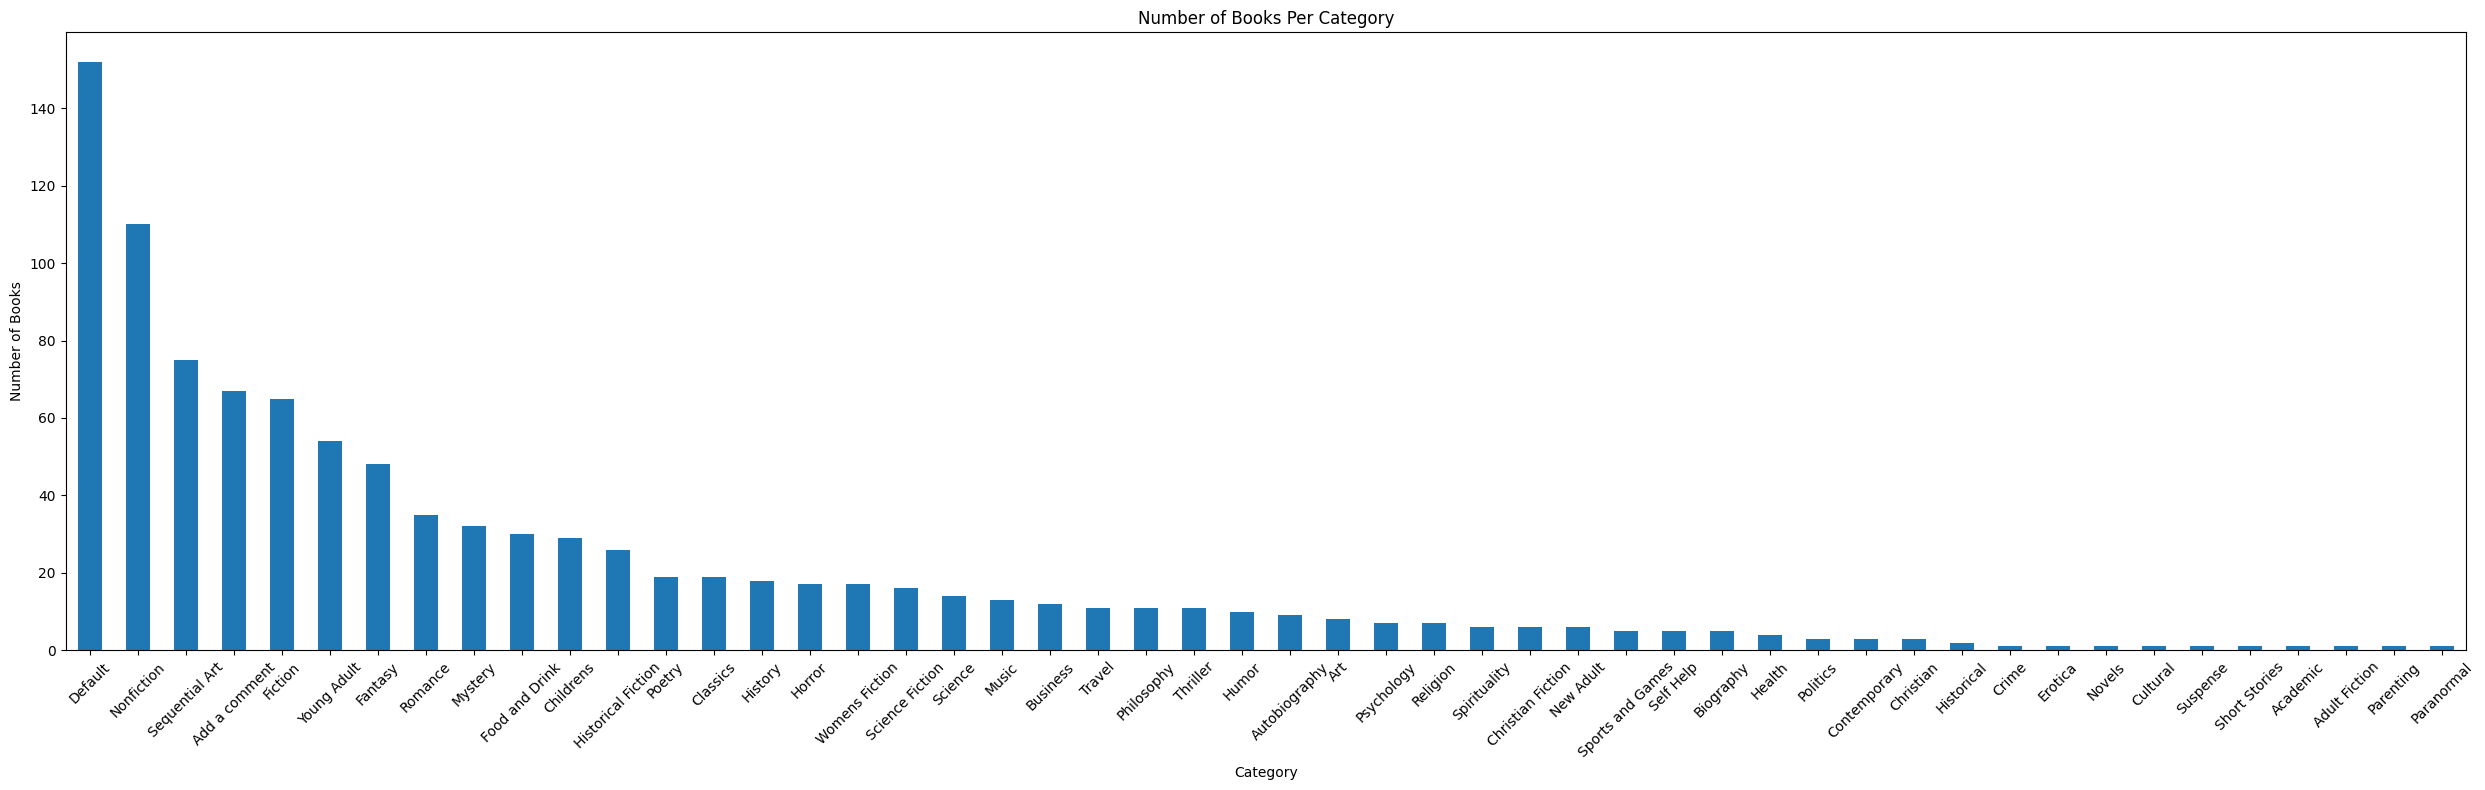

In [5]:

books_per_category = df["Category"].value_counts()

plt.figure(figsize=(25, 8))
books_per_category.plot(kind="bar")
plt.title("Number of Books Per Category")
plt.xlabel("Category")
plt.ylabel("Number of Books")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


What is Web Scraping?

Web Scraping is the process of automatically extracting large amounts of information from websites.
It involves sending a request to a website, retrieving the data (usually in the form of HTML), and then parsing and organizing the information in a structured format like CSV, Excel, or a database.

Instead of manually copying and pasting content from webpages, web scraping uses computer programs to quickly and efficiently collect the required data.

Key Points About Web Scraping:
Automation:
Web scraping automates the collection of information from websites.

Data Extraction:
It pulls specific pieces of data such as text, images, prices, product details, etc., from the HTML content.

Tools and Libraries:
Popular libraries used for web scraping include:

requests (to fetch webpage content)

BeautifulSoup (to parse and extract data)

Selenium (to automate browsers for dynamic content)

Scrapy (a full-fledged web scraping framework)

Common Uses:

Price monitoring (e.g., online shopping sites)

Market research

News aggregation

Data collection for machine learning

Academic research

How Web Scraping Works:
Send Request:
The program sends a request to the server hosting the website.

Download Webpage:
The server responds by sending the webpage’s HTML content.

Parse Content:
The program reads the HTML and locates the required information.

Extract and Store:
The extracted information is stored in a structured format (like a table, CSV, or database) for further analysis.

Example:
Suppose you want a list of all books and their prices from an online bookstore. Instead of manually noting down each book, a web scraper would:

Access each webpage,

Extract the book titles and prices,

Save them into an Excel or CSV file automatically.